# Pipeline Usage

In this example we will show how to use Dialog2Graph via python API.

First of all we need to import the `ModelStorage` and `Pipeline` we will be using.

In [1]:
import os
import getpass
import logging
import warnings

logging.disable(level=logging.CRITICAL)
warnings.filterwarnings("ignore")

In [ ]:
# Required to run D2GLLMPipeline
os.environ["OPENAI_API_KEY"] = getpass.getpass()

# Replace if you use different base_url
base_url = ""
if base_url:
    os.environ["OPENAI_BASE_URL"] = base_url

In [3]:
from langchain_openai.chat_models import ChatOpenAI

from dialog2graph.pipelines.model_storage import ModelStorage
from dialog2graph.pipelines.d2g_llm.pipeline import D2GLLMPipeline
from dialog2graph.pipelines.helpers.parse_data import PipelineRawDataType

`ModelStorage` instance is used to store LLM and SentenceTransformer models and use cached variants to avoid multiple instances of the same model being up simultaneously.

Each `Pipeline` has it's own default models, but you can override them by passing the key to the model you've added to the `ModelStorage`

In [4]:
ms = ModelStorage()
ms.add(
    "my_filling_model",
    config={"model_name": "gpt-3.5-turbo"},
    model_type=ChatOpenAI,
)
pipe = D2GLLMPipeline("d2g_pipeline", model_storage=ms, filling_llm="my_filling_model")

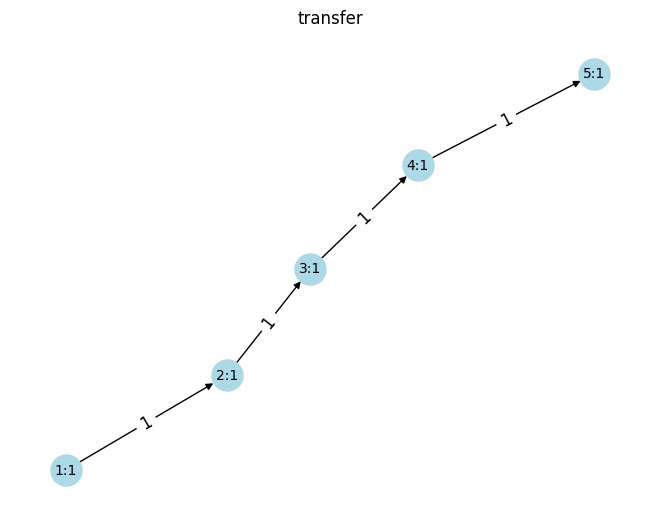

In [5]:
data = [
    {"text": "Hey there! How can I help you today?", "participant": "assistant"},
    {"text": "I need to book a ride to the airport.", "participant": "user"},
    {
        "text": "Sure! I can help with that. When is your flight, and where are you departing from?",
        "participant": "assistant",
    },
    {"text": "Do you have any other options?", "participant": "user"},
    {
        "text": "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
        "participant": "assistant",
    },
    {"text": "No, I'll manage on my own.", "participant": "user"},
    {"text": "No worries! Feel free to reach out anytime.", "participant": "assistant"},
    {"text": "Alright, thanks anyway.", "participant": "user"},
    {"text": "You're welcome! Have a fantastic trip!", "participant": "assistant"},
]
data = PipelineRawDataType(dialogs=data)
graph, report = pipe.invoke(data)
graph.visualise_short("transfer")

Also you can load and dump the models with their configs to the `.yml` files.

In [6]:
ms.save("models_config.yml")

In [7]:
!cat models_config.yml

my_filling_model:
  config:
    model_name: gpt-3.5-turbo
  model_type: ChatOpenAI
three_stages_llm_formatting_llm:v1:
  config:
    model_name: gpt-4o-mini
    temperature: 0
  model_type: ChatOpenAI
three_stages_llm_grouping_llm:v1:
  config:
    model_name: chatgpt-4o-latest
    temperature: 0
  model_type: ChatOpenAI
three_stages_llm_sim_model:v1:
  config:
    model_kwargs:
      device: cpu
    model_name: BAAI/bge-m3
  model_type: HuggingFaceEmbeddings
